### Background and Context
AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors)
.

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success rated more.

### Objective
1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more. 

In [589]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)



In [590]:
data = pd.read_csv("Downloads/Loan_Modelling.csv")

In [591]:
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [592]:
data.shape

(5000, 14)

In [593]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [594]:
# Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
]
data[cat_cols] = data[cat_cols].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(7)
memory usage: 342.7 KB


In [595]:
data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,56.498800
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,101.713802
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


- **ID**: The unique ID attribute adds no value to the analysis since it has no correlation with loan outcomes or patterns among potential loan customers, so it can be excluded from the model.

- **Age**: Customers' average age is 45, with a broad range from 23 to 67 years.

- **Experience**: An experience value of -3 likely reflects a data entry error. The average working experience is around 20 years, with some highly experienced professionals included.

- **Income**: The average income is $73,000, ranging from $8,000 to $224,000. A notable gap between the 75th percentile and maximum income suggests potential outliers.

- **ZIPCode**: ZIPCode has a high level of uniqueness, and further analysis may reveal patterns.

- **Family**: Most (75%) customers have three or fewer dependents.

- **CCAvg**: Some customers report $0 in average monthly credit card spending. Significant differences between the 75th percentile and maximum values suggest potential outliers.

- **Mortgage**: The average mortgage amount is approximately $56,000, though many customers have no mortgage.

In [596]:
# dropping ID column
data = data.drop(["ID"], axis=1)

In [597]:
data.describe(include=["category"]).T

,count,unique,top,freq
Education,5000,3,1,2096
Personal_Loan,5000,2,0,4520
Securities_Account,5000,2,0,4478
CD_Account,5000,2,0,4698
Online,5000,2,1,2984
CreditCard,5000,2,0,3530


In [598]:
for i in cat_cols:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Education are :
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64
**************************************************
Unique values in Personal_Loan are :
Personal_Loan
0    4520
1     480
Name: count, dtype: int64
**************************************************
Unique values in Securities_Account are :
Securities_Account
0    4478
1     522
Name: count, dtype: int64
**************************************************
Unique values in CD_Account are :
CD_Account
0    4698
1     302
Name: count, dtype: int64
**************************************************
Unique values in Online are :
Online
1    2984
0    2016
Name: count, dtype: int64
**************************************************
Unique values in CreditCard are :
CreditCard
0    3530
1    1470
Name: count, dtype: int64
**************************************************


- **Education**: Most customers fall into category 1 (2,096), followed by category 3 (1,501) and category 2 (1,403).
  
- **Personal Loan**: 480 customers have taken a personal loan, while 4,520 have not.

- **Securities Account**: 522 customers hold a securities account, while 4,478 do not.

- **CD Account**: 302 customers have a CD account, and 4,698 do not.

- **Online**: 2,984 customers use online services, while 2,016 do not.

- **Credit Card**: 1,470 customers hold a credit card, whereas 3,530 do not.

## Exploratory Data Analysis.

In [599]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observation On CCAvg

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


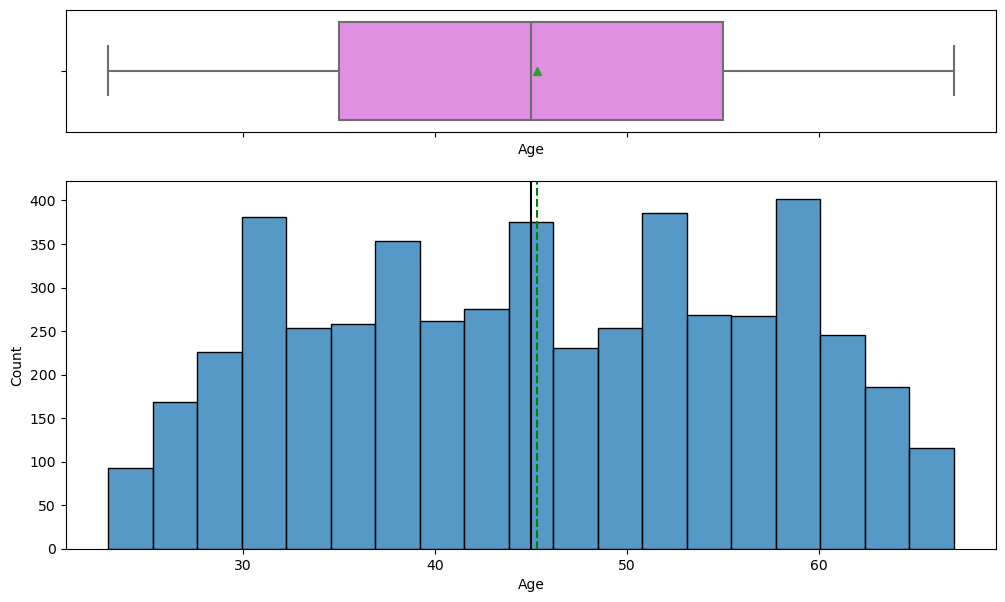

In [600]:
histogram_boxplot(data,"Age")

In [601]:
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3], dtype=int64)

In [602]:
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [603]:
data["Experience"].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


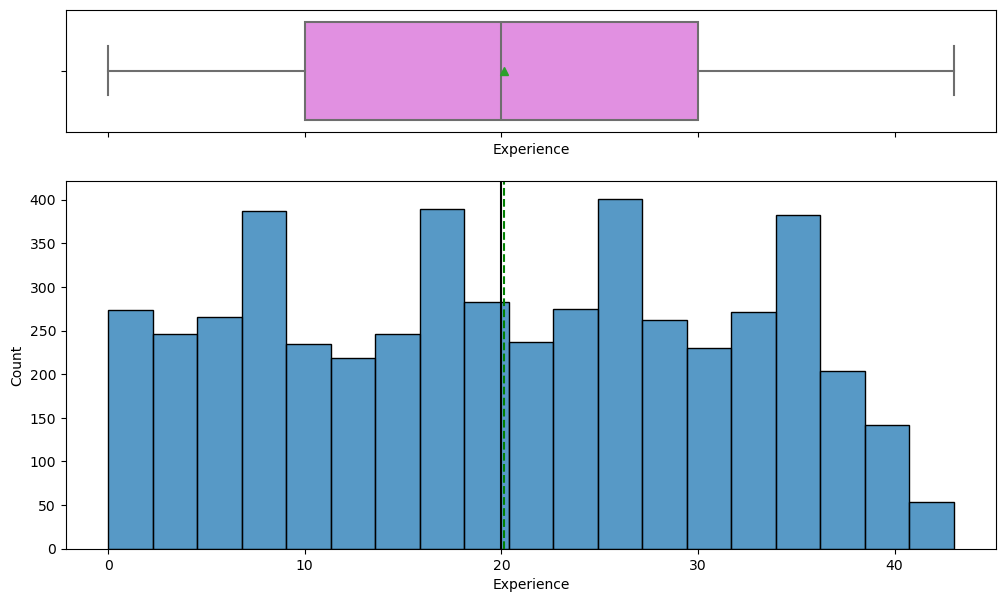

In [604]:
histogram_boxplot(data, "Experience")

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


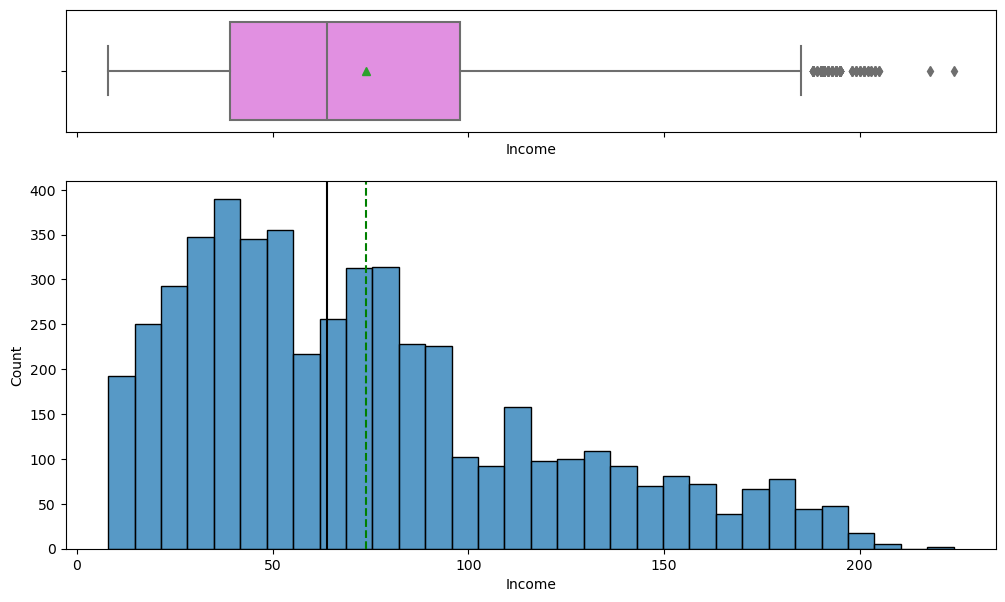

In [605]:
histogram_boxplot(data, "Income")

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


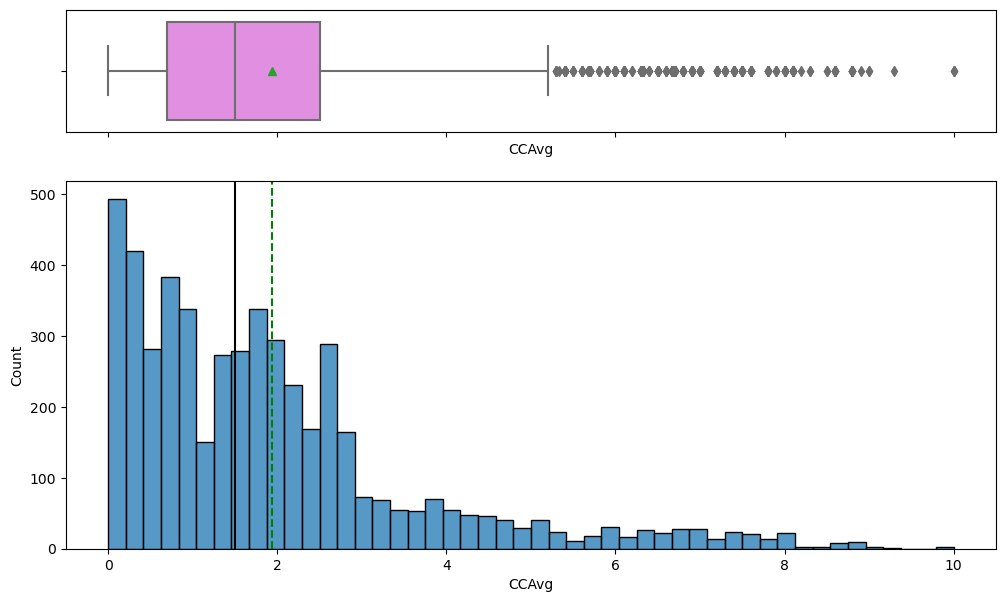

In [606]:
histogram_boxplot(data, "CCAvg")

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


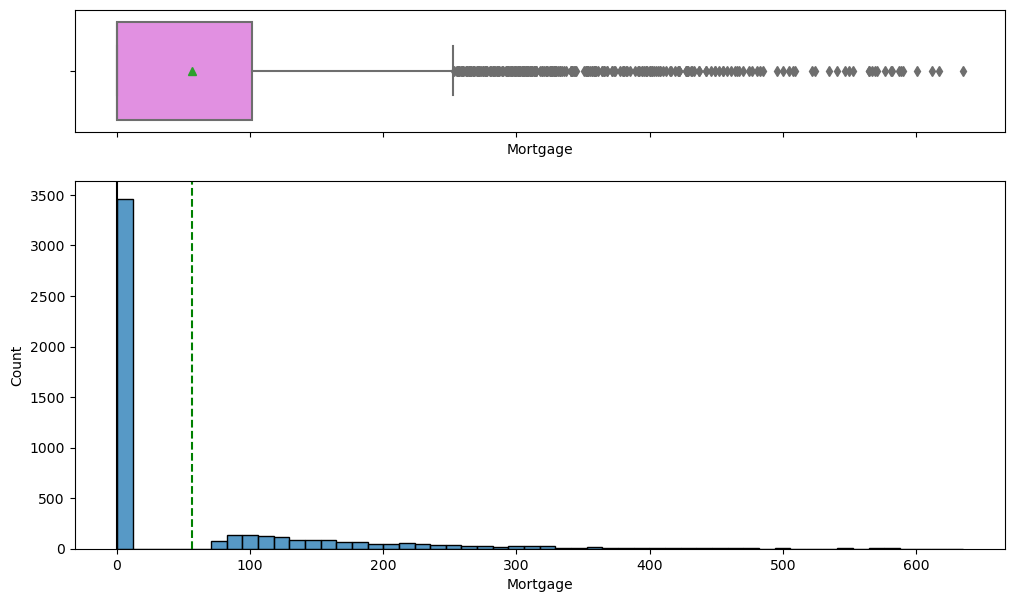

In [607]:
histogram_boxplot(data, "Mortgage")

In [608]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observation on Family 

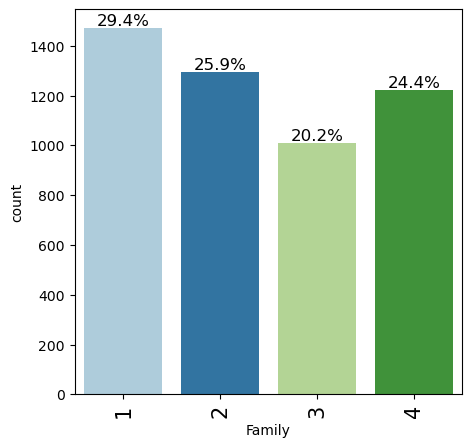

In [609]:
labeled_barplot(data, "Family", perc=True)

In [610]:
data["Education"].replace(1, "Undergraduate", inplace=True)
data["Education"].replace(2, "Graduate", inplace=True)
data["Education"].replace(3, "Professional", inplace=True)

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


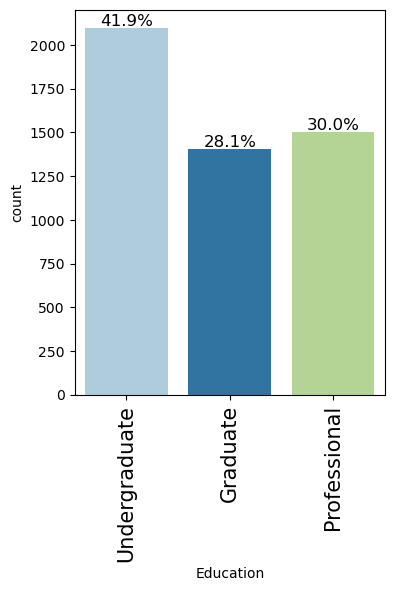

In [611]:
labeled_barplot(data, "Education", perc=True)

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


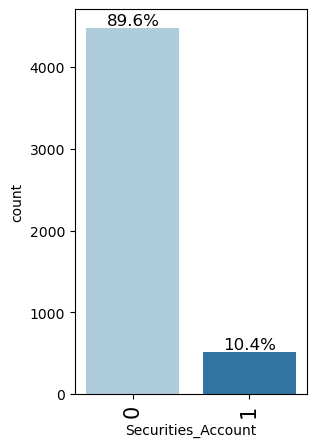

In [612]:
labeled_barplot(data, "Securities_Account", perc=True)

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


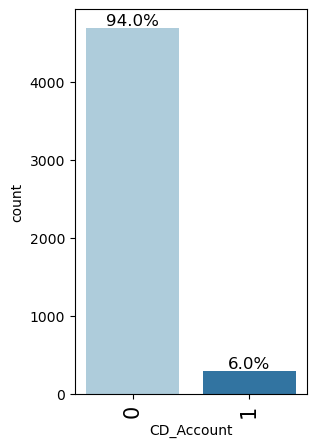

In [613]:
labeled_barplot(data, "CD_Account", perc=True)

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


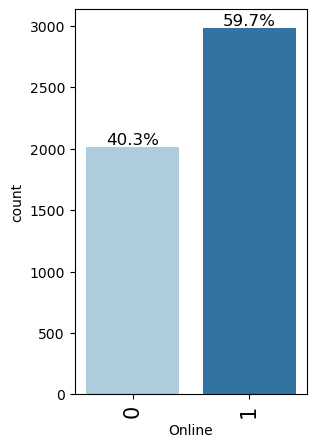

In [614]:
labeled_barplot(data, "Online", perc=True)

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


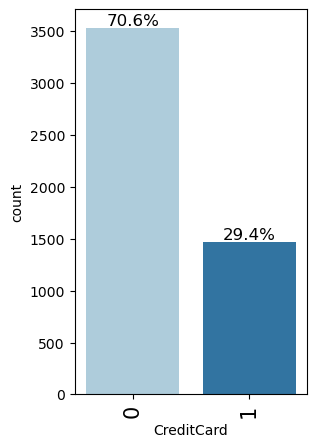

In [615]:
labeled_barplot(data, "CreditCard", perc=True)

In [616]:
data["ZIPCode"].nunique()

467

In [617]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

Number of unique values if we take first two digits of ZIPCode:  7


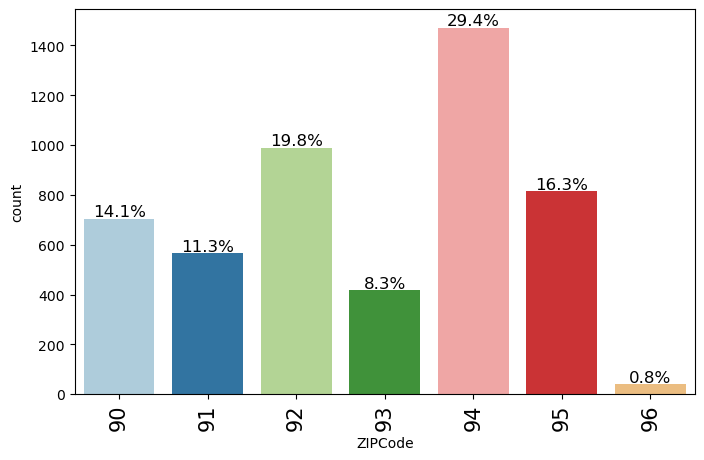

In [618]:
labeled_barplot(data, "ZIPCode", perc=True)

### Finding the percentage of outliers, in each column of the data, using IQR.

# Select only numeric columns from data
data = data.select_dtypes(include=[float, int])

# Check if data is empty
if data.empty:
    print("DataFrame is empty. Please check your data.")
else:
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print("Quantiles and IQR calculated successfully.")

# Calculate quantiles, IQR, and outlier bounds
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

The result shows the number of outliers detected in each column of the dataset based on the IQR method. Here’s an interpretation of each value:

- **Age**: 0 outliers. This suggests that the values in the "Age" column are well within the typical range, with no unusually high or low ages based on the IQR bounds.

- **Experience**: 0 outliers. This indicates that "Experience" values are also within a normal range without extreme values.

- **Income**: 1.92 outliers. This is unusual because the count of outliers should be an integer. This could be a result of averaging across multiple datasets or an unintended calculation. However, if we interpret this value as indicating around 2 outliers, it would mean there are a couple of extreme "Income" values, possibly very high earners, compared to the rest of the dataset.

- **Family**: 0 outliers. The "Family" values are within the expected range without extreme values, indicating that family sizes are consistent across the dataset.

- **CCAvg**: 6.48 outliers. This suggests there are approximately 6 or 7 outliers in the "CCAvg" (average monthly credit card spending) column. These outliers could represent customers with unusually high or low spending on credit cards.

- **Mortgage**: 5.82 outliers. This indicates there are about 5 or 6 outliers in the "Mortgage" column, meaning a few customers have unusually high mortgage amounts compared to others.

### Summary
- Most columns have few or no outliers, except for **CCAvg** and **Mortgage**, which show several outliers. This suggests that while age, experience, and family size are relatively consistent across customers, credit card spending and mortgage amounts vary significantly, with a few customers having exceptionally high or low values.
  
If the non-integer values are due to a calculation error, ensure that outlier counts are rounded to integers to provide an accurate count of outliers per column.

### Bivariate Analysis 

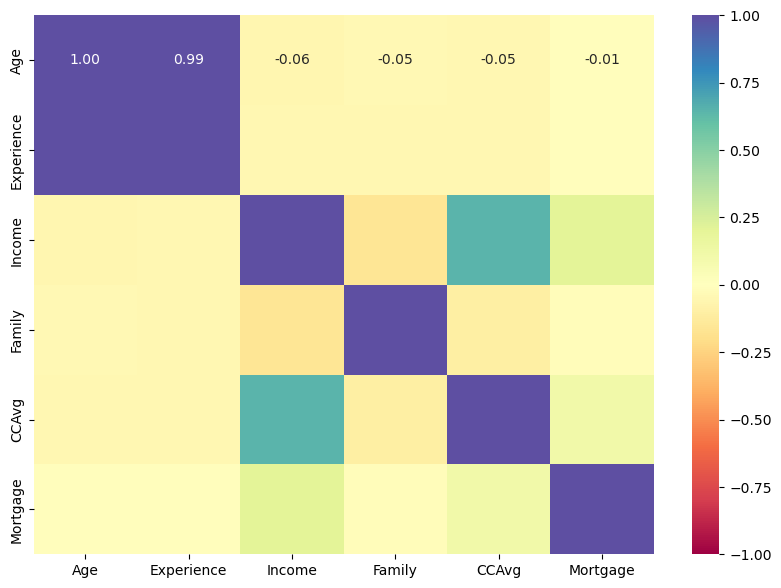

In [619]:
 # Filter to include only numeric columns
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(10, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


The heatmap provides insights into the correlation between various features in the dataset:

1. **High Correlation**:
   - There is a very high positive correlation (0.99) between **Age** and **Experience**, indicating that these two variables are nearly linear with each other. This suggests that either feature could be redundant for modeling purposes, as they convey almost the same information.

2. **Low or Negligible Correlations**:
   - Most other variables, such as **Income**, **Family**, **CCAvg**, and **Mortgage**, show very low correlations with each other and with **Age** and **Experience**. The correlations are close to zero (around -0.06 to 0.06), indicating weak or no linear relationship among them.
   - This suggests that these features do not influence each other strongly and are likely to provide unique information for modeling.

3. **Feature Selection Implication**:
   - Given the high correlation between **Age** and **Experience**, it may be beneficial to remove one of these features to avoid multicollinearity, especially if used in regression-based models.
   - Other features do not display multicollinearity and may be used together without issues. 

In summary, the dataset appears to have minimal multicollinearity issues aside from the strong relationship between Age and Experience.

###  Data Preparation


In [620]:
data["ZIPCode"] = data["ZIPCode"].astype("category")

In [621]:
X = data.drop(["Personal_Loan"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [622]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 18)
Shape of test set :  (1500, 18)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


### Building The Model

In [623]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [624]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression (with Sklearn library)

In [625]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

In [626]:
y_pred_train = lg.predict(X_train)

In [627]:
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.9565714285714285
Precision: 0.8623481781376519
Recall: 0.6435045317220544
F1: 0.7370242214532872


In [628]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

In [629]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.9573333333333334
Precision: 0.912621359223301
Recall: 0.6308724832214765
F1: 0.746031746031746


### Dropping Age and Experience To Reduce Multicollinearity 

In [630]:
X_train1 = X_train.drop(["Age"], axis=1)
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           16
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                  0.2746
Time:                        20:47:23   Log-Likelihood:                -794.61
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                9.958e-118
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Experience                -0.0699      0.006    -12.121      0.000      -0.081      -0.059
Income                     0.0190      0.002     11.417      0.000       0.016       0.022
Fami

In [631]:
X_train2 = X_train1.drop(["Experience"], axis=1)
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3484
Method:                           MLE   Df Model:                           15
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                  0.1952
Time:                        20:47:23   Log-Likelihood:                -881.58
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                 1.001e-81
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Income                     0.0135      0.002      8.941      0.000       0.011       0.016
Family                    -0.5573      0.053    -10.512      0.000      -0.661      -0.453
CCAv

In [632]:
X_train3 = X_train2.drop(["Mortgage"], axis=1)
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3485
Method:                           MLE   Df Model:                           14
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                  0.1952
Time:                        20:47:23   Log-Likelihood:                -881.59
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                 1.785e-82
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Income                     0.0136      0.001      9.174      0.000       0.011       0.016
Family                    -0.5570      0.053    -10.519      0.000      -0.661      -0.453
CCAv

Key Insights:

Significance of Predictors:

The P>|z| column shows the p-values for each coefficient. Predictors with p-values less than 0.05 are statistically significant, meaning they likely have a meaningful effect on the outcome.
All predictors in this model are statistically significant, with very low p-values (all are less than 0.05), suggesting that each variable contributes to predicting the likelihood of a personal loan.
Direction and Strength of Relationship:

The coef column shows the coefficient values for each predictor, indicating the direction of the relationship with the likelihood of taking a loan.
Positive coefficients indicate a positive relationship with the likelihood of a personal loan, while negative coefficients indicate a negative relationship.
Positive relationships: Income, CCAvg, CD_Account, Education_Graduate, and Education_Professional have positive coefficients, suggesting that higher values in these features increase the likelihood of taking a personal loan.
Negative relationships: Family, Securities_Account, Online, CreditCard, and certain ZIPCode dummies (e.g., ZIPCode_91 to ZIPCode_96) have negative coefficients, indicating that higher values in these features or being in these categories decrease the likelihood of a loan.

### Converting coefficients to odds.

In [633]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,Income,Family,CCAvg,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Education_Graduate,Education_Professional
Odds,1.013644,0.572935,1.121935,0.128663,122.672208,0.215361,0.150944,0.118327,0.122507,0.156809,0.114131,0.110037,0.039836,2.068667,1.684744
Change_odd%,1.364447,-42.706497,12.193531,-87.133687,12167.220751,-78.463869,-84.905605,-88.167315,-87.749291,-84.319119,-88.586858,-88.996268,-96.016358,106.866709,68.474396


### Decision Trees

In [635]:
# Splitting the data again
X = data.drop(["Personal_Loan"], axis=1)
y = data["Personal_Loan"]
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [636]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [637]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [638]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

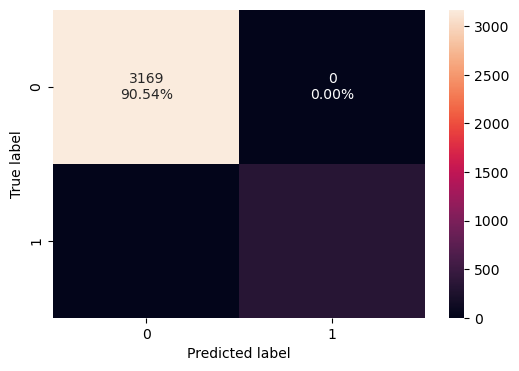

In [639]:
confusion_matrix_statsmodels(model, X_train, y_train)

In [640]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


The performance metrics indicates perfect classification results for your model on the training dataset. Here’s what each metric means in this context:

1. **Accuracy (1.0)**: This means that the model correctly predicted all instances in the training set. In other words, 100% of the predictions made by the model were correct.

2. **Recall (1.0)**: Recall measures the ability of the model to find all the relevant instances (true positives) in the dataset. A recall of 1.0 (or 100%) indicates that the model successfully identified all positive instances, meaning there were no false negatives.

3. **Precision (1.0)**: Precision assesses the accuracy of the positive predictions made by the model. A precision of 1.0 (or 100%) means that every instance the model predicted as positive was indeed a true positive, indicating no false positives.

4. **F1 Score (1.0)**: The F1 score is the harmonic mean of precision and recall. An F1 score of 1.0 indicates perfect balance between precision and recall, reinforcing that the model has no false positives and false negatives.

### Overall Interpretation:
- The model is performing exceptionally well on the training data, achieving perfect scores across all metrics. However, it's essential to be cautious with such results, as they might indicate overfitting, especially if the model's performance on the validation or test set is not similarly high. Overfitting occurs when a model learns the training data too well, including its noise and outliers, resulting in poor generalization to new, unseen data.



In [641]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Graduate', 'Education_Professional']


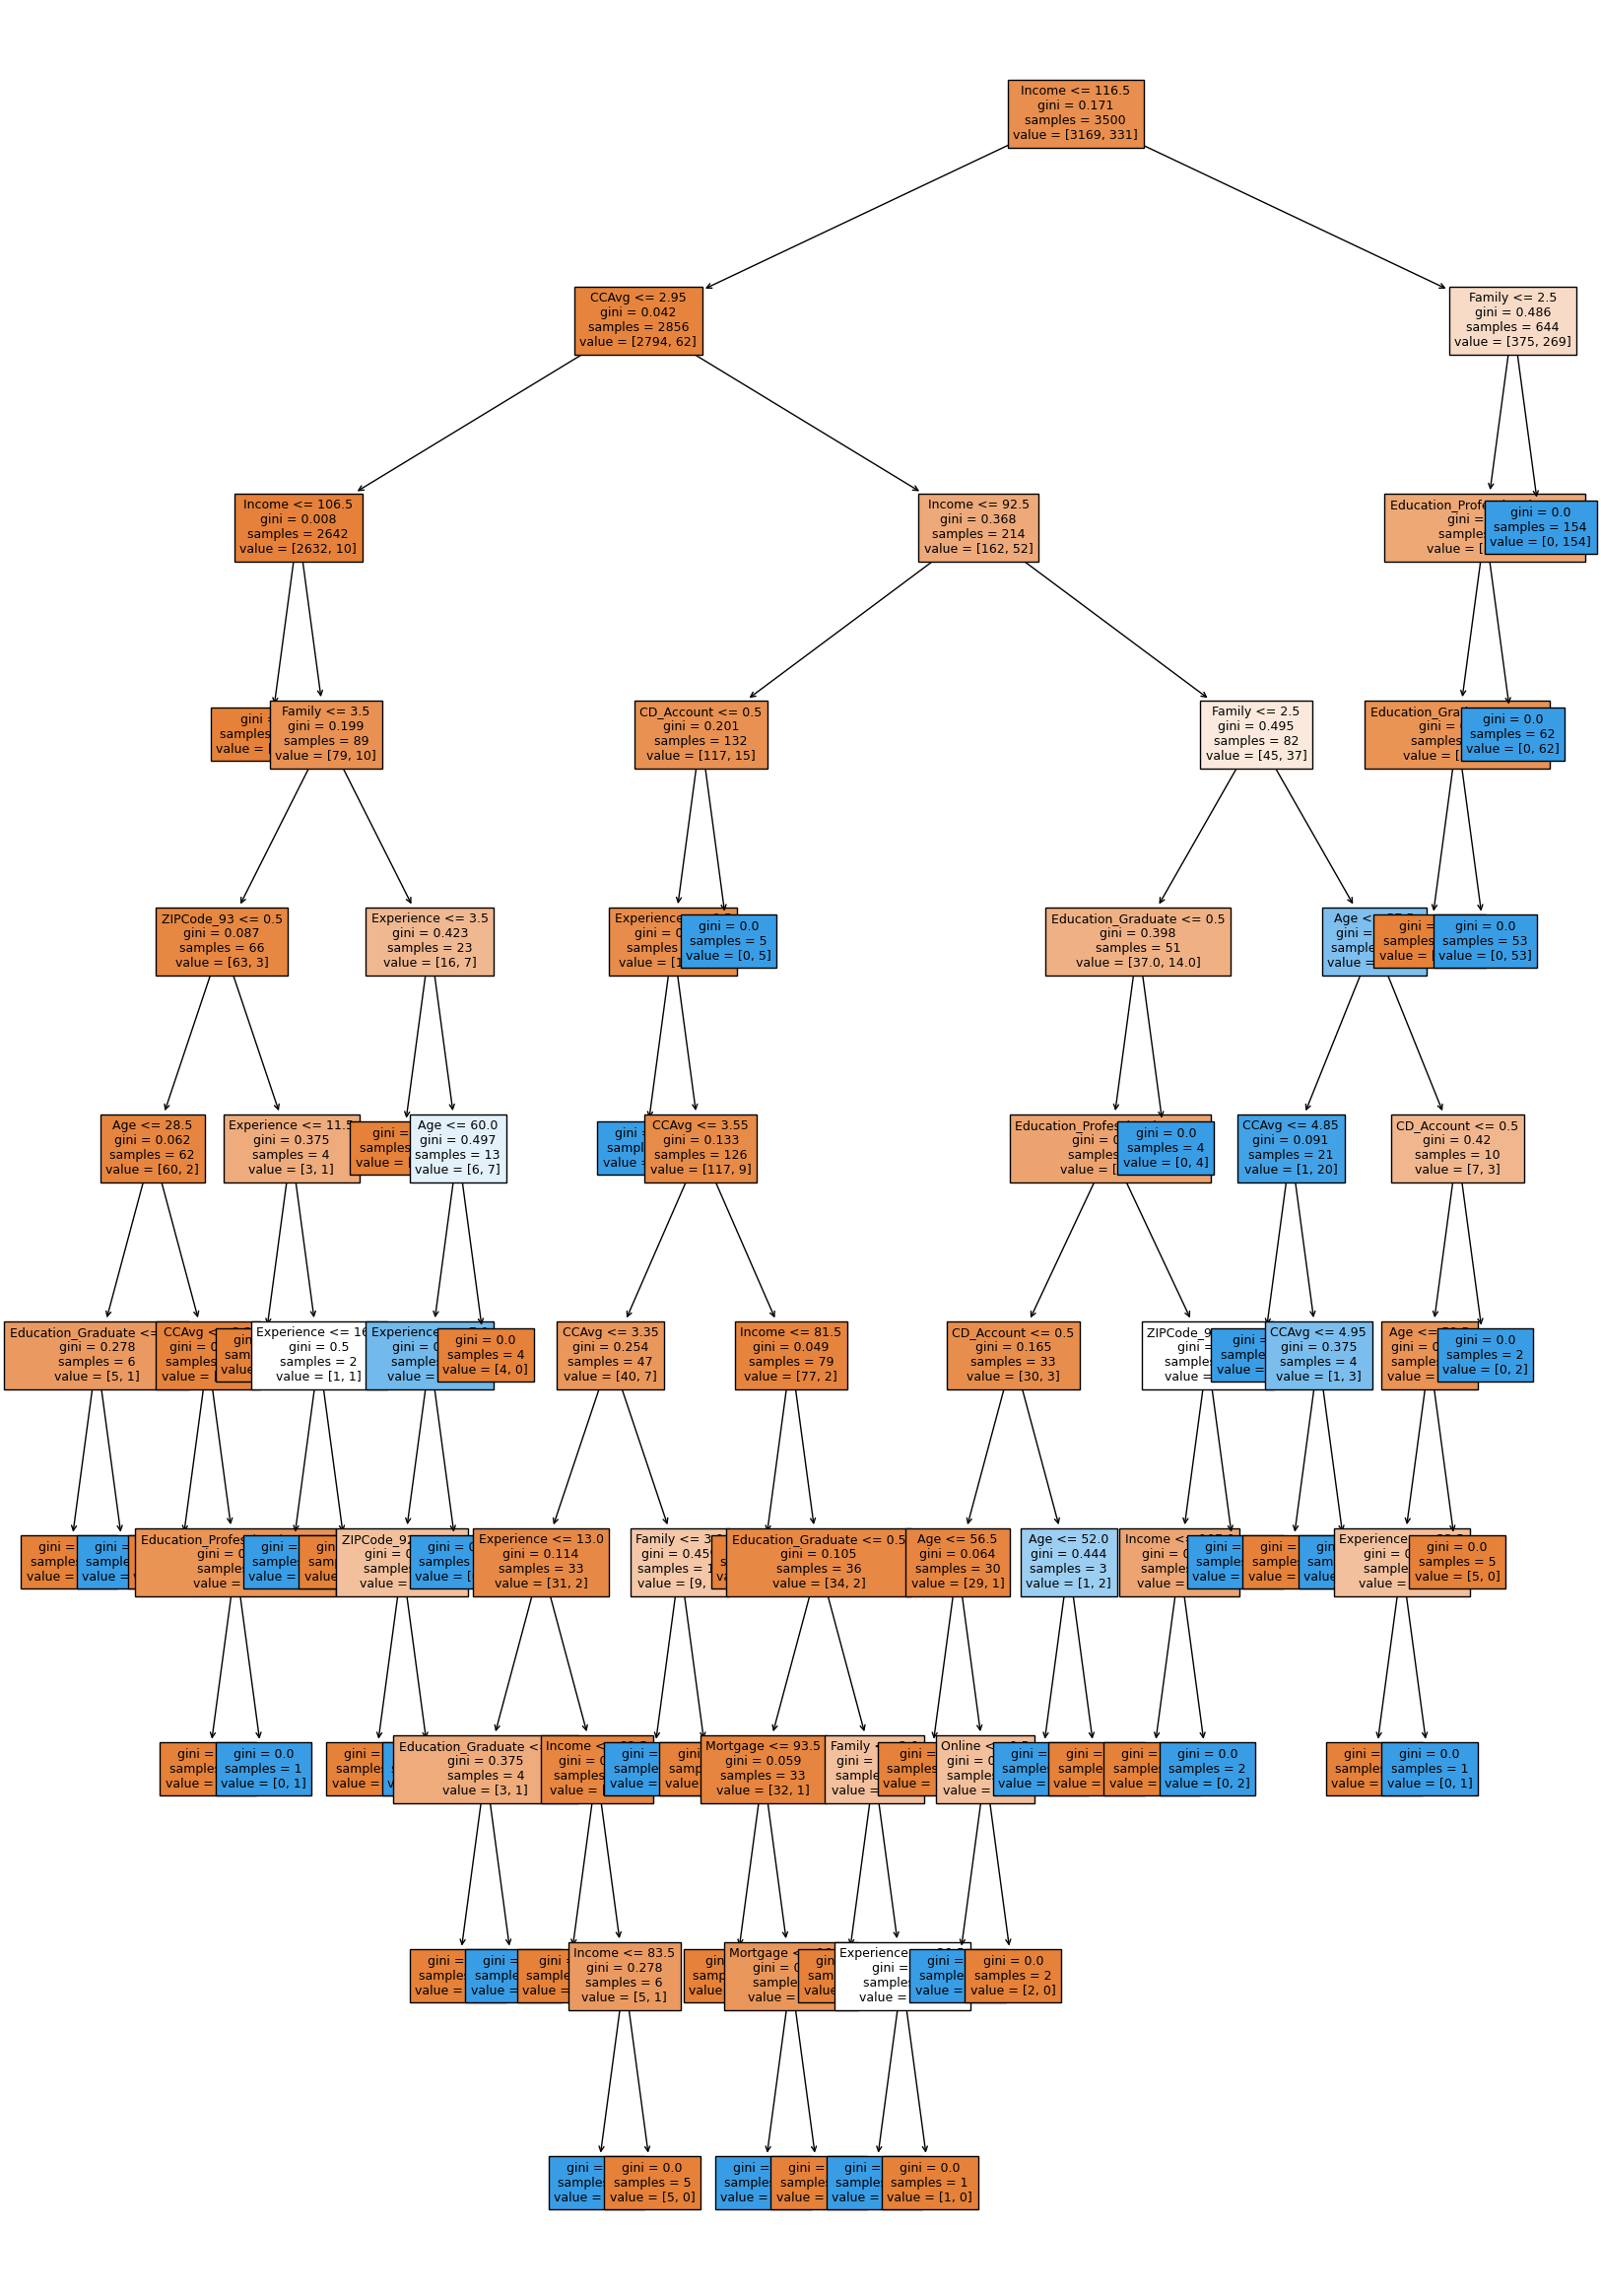

In [642]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [643]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Graduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_Graduate >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|

In [644]:
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income                  0.306430
Family                  0.258143
Education_Graduate      0.168695
Education_Professional  0.147127
CCAvg                   0.045718
CD_Account              0.021361
Age                     0.019531
Experience              0.018229
ZIPCode_94              0.006488
Mortgage                0.003236
Online                  0.002224
ZIPCode_92              0.002224
ZIPCode_93              0.000594
Securities_Account      0.000000
ZIPCode_91              0.000000
ZIPCode_95              0.000000
ZIPCode_96              0.000000
CreditCard              0.000000


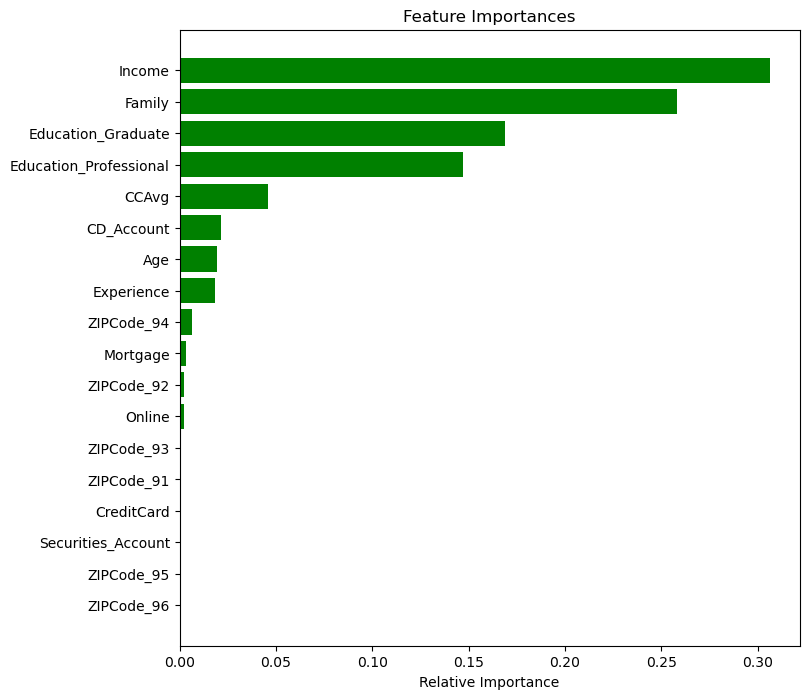

In [646]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()